In [75]:
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
import seaborn as sns
import pickle as pkl
from core import *

In [76]:
background_dir = "./Data/background_yarrays"
virus_dir = "./Data/yarrays"

In [90]:
with open(f"{background_dir}/background_all_y.pkl",'rb') as infile:
    background_yarrays = pkl.load(infile)
with open(f"{virus_dir}/virus_all_y.pkl",'rb') as infile:
    virus_yarrays = pkl.load(infile)

array([[[0.50000012-0.50000001j, 1.00000001-1.00000026j],
        [0.50000012-0.50000001j, 1.00000001-1.00000026j]],

       [[0.50000027+0.50000018j, 1.00000001+1.00000008j],
        [0.50000027+0.50000018j, 1.00000001+1.00000008j]],

       [[0.50000024-0.4999999j , 1.00000001-1.00000012j],
        [0.50000024-0.4999999j , 1.00000001-1.00000012j]],

       [[0.50000022+0.49999976j, 0.99999977+1.00000019j],
        [0.50000022+0.49999976j, 0.99999977+1.00000019j]],

       [[0.50000011-0.49999971j, 0.99999955-1.00000006j],
        [0.50000011-0.49999971j, 0.99999955-1.00000006j]],

       [[0.50000033+0.49999986j, 0.99999946+1.0000001j ],
        [0.50000033+0.49999986j, 0.99999946+1.0000001j ]],

       [[0.50000025-0.49999992j, 0.9999992 -1.00000006j],
        [0.50000025-0.49999992j, 0.9999992 -1.00000006j]],

       [[0.50000001+0.49999991j, 0.9999991 +0.99999994j],
        [0.50000001+0.49999991j, 0.9999991 +0.99999994j]],

       [[0.50000013-0.50000005j, 0.99999888-0.99999999j]

In [78]:
y0 = np.array([[complex(0.5,0.5),complex(1,1)],[complex(0.5,0.5),complex(1,1)]])

all_y = np.zeros((10,20,2,2),dtype="complex128")

for i in range(10):

    def Y(y,t):
        seq = DNA(5)
        alg = Sequence(seq).run()
        y_t = matrix_multiply(y,expm(alg))
        return y_t

    y_array = np.zeros((20,2,2),dtype="complex128")
    y = y0
    for n in range(20):
        y = rkmk_step(Y,y,n)
        y_array[n] = y

    all_y[i-1] = y_array

In [79]:
def matrix_vector_multiply(m,v,vector_type="row"):
    if vector_type == "row":
        return np.array([np.vdot(v,i) for i in m.T])
    elif vector_type == "column":
        return np.array([np.vdot(i,v) for i in m])

def vector_multiply(v1,v2):
    return np.vdot(v1,v2)

In [80]:
def random_complex_vector(n_components=2):
    vals = np.random.rand(n_components,2)
    vector = np.zeros(n_components,dtype="complex128")
    for i in range(n_components):
        vector[i] = complex(vals[i,0],vals[i,1])
    return vector

In [81]:
random_complex_vector()

array([0.86790372+0.92062319j, 0.67220254+0.3856258j ])

In [82]:
all_y[0].shape

(20, 2, 2)

In [83]:
v1 = random_complex_vector()
v2 = v1
vv = v1
v1s = []
v2s = []
vvs = []

In [84]:
for i in all_y[0]:
    v1 = matrix_vector_multiply(i,v1)
    v1s.append(v1)
    print(v1)

[0.22105845-0.97305926j 0.44211685-1.94611872j]
[-1.12800156+1.79117658j -2.2560023 +3.58235347j]
[-4.37876683-0.99476245j -8.75753448-1.9895276j ]
[ -8.0602957  -5.0760065j  -16.12059485-10.15200962j]
[-4.47643991+19.70445496j -8.95288165+39.40890904j]
[22.84201902-36.27134799j 45.68404681-72.54269323j]
[ 88.67004691+20.14400715j 177.34012868+40.28799037j]
[163.22106275+102.78904499j 326.44221156+205.57819811j]
[ 90.64807305-399.01512301j 181.29611094-798.03068969j]
[-462.55060204 +734.49471277j -925.10170115+1468.99033184j]
[-1795.56748318-407.91589759j -3591.13779675-815.83302727j]
[-3305.22461301-2081.47798983j -6610.45643983-4162.95650453j]
[-1835.62115135 +8080.05189991j -3671.25039113+16160.12003609j]
[ 9366.64586557-14873.5076218j  18733.3024217 -29747.05141838j]
[36360.21964956 +8260.29897895j 72720.52263876+16520.62833093j]
[ 66930.7704591 +42149.86837803j 133861.72432992+84299.81773382j]
[37171.35587633-163620.92580504j 74342.9240688 -327242.28498906j]
[-189674.31037248+3011

In [85]:
for i in all_y[0]:
    v2 = matrix_vector_multiply(i,v2,"column")
    v2s.append(v2)
    print(v2)

[0.57228208+1.55750041j 0.57228208+1.55750041j]
[3.1946737+1.47782761j 3.1946737+1.47782761j]
[2.57526958+7.00875216j 2.57526958+7.00875216j]
[14.37603332+6.65022573j 14.37603332+6.65022573j]
[11.58871711+31.53939005j 11.58871711+31.53939005j]
[64.69216564+29.92601474j 64.69216564+29.92601474j]
[52.14924635+141.92727638j 52.14924635+141.92727638j]
[291.11477735+134.6670591j 291.11477735+134.6670591j]
[234.6716554+638.67276502j 234.6716554+638.67276502j]
[1310.01658054+606.00172968j 1310.01658054+606.00172968j]
[1056.02212056+2874.0270709j 1056.02212056+2874.0270709j]
[5895.07369268+2727.00731879j 5895.07369268+2727.00731879j]
[4752.10039941+12933.12063464j 4752.10039941+12933.12063464j]
[26527.82861651+12271.52817503j 26527.82861651+12271.52817503j]
[21384.45547733+58199.02411062j 21384.45547733+58199.02411062j]
[119375.19957765+55221.85944993j 119375.19957765+55221.85944993j]
[96230.04267389+261895.55048995j 96230.04267389+261895.55048995j]
[537188.33549022+248498.34745032j 537188.335

In [86]:
for i in range(20):
    print(np.abs(v1s[i],np.abs(v2s[i])))

[0.99785328 1.99570674]
[2.11676665 4.23353313]
[4.49033978 8.98068095]
[ 9.52545058 19.05090228]
[20.20653507 40.41306968]
[42.86453683 85.72907602]
[ 90.92941352 181.85885573]
[192.8903914  385.78091325]
[409.182284   818.36499285]
[ 868.0066489  1736.01432958]
[1841.31962629 3682.64228559]
[3906.0287204  7812.06382472]
[ 8285.93650208 16571.89062887]
[17577.12387584 35154.28405913]
[37286.70154608 74573.49108969]
[ 79097.0254721  158194.24929666]
[167790.09821495 335580.66607593]
[355936.50385894 711874.11487957]
[ 755055.19364454 1510113.00563686]
[1601714.10599152 3203433.41208952]


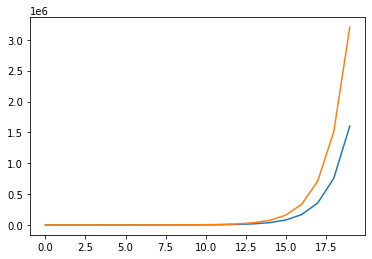

In [87]:
plt.plot(np.arange(0,20),np.abs(v1s))

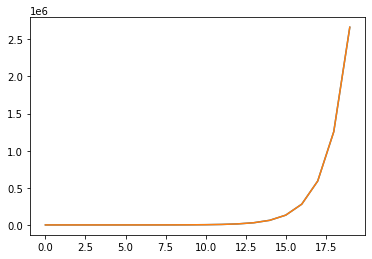

In [88]:
plt.plot(np.arange(0,20),np.abs(v2s))

In [91]:
vvs = []
for i in virus_yarrays[0]:
    print(i)
    vv = matrix_vector_multiply(i,vv,"column")
    vvs.append(vv)
    print(vv)

[[0.50000012-0.50000001j 1.00000001-1.00000026j]
 [0.50000012-0.50000001j 1.00000001-1.00000026j]]


ValueError: cannot reshape array of size 0 into shape (2,)